In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import h5py
import copy
from PIL import Image

%matplotlib inline

### Load Data

In [2]:
train_dataset = h5py.File("datasets/train_catvnoncat.h5")
test_dataset = h5py.File("datasets/test_catvnoncat.h5")

train_x_orig = np.array(train_dataset["train_set_x"][:])
train_y_orig = np.array(train_dataset["train_set_y"][:])

test_x_orig = np.array(test_dataset["test_set_x"][:])
test_y_orig = np.array(test_dataset["test_set_y"][:])

classes = np.array(test_dataset["list_classes"][:])

In [3]:
train_y_orig = train_y_orig.reshape(1, train_y_orig.shape[0]) 
test_y_orig = test_y_orig.reshape(1, test_y_orig.shape[0])

### Check Data

In [4]:
print(f"X train: {train_x_orig.shape}")
print(f"y train: {train_y_orig.shape}")
print(f"X test: {test_x_orig.shape}")
print(f"Y test: {test_y_orig.shape}")

X train: (209, 64, 64, 3)
y train: (1, 209)
X test: (50, 64, 64, 3)
Y test: (1, 50)


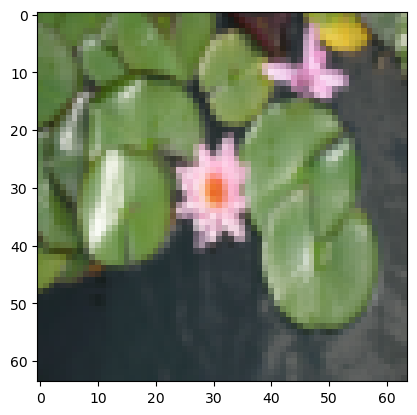

Y = [0]. It is a non-cat


In [5]:
index = 26

plt.imshow(train_x_orig[index])
plt.show()
print(f"Y = {train_y_orig[:, index]}. It is a {classes[np.squeeze(train_y_orig[:, index])].decode('utf-8')}")

In [6]:
m_train = train_x_orig.shape[0]
m_test = test_x_orig.shape[0]
num_px = train_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)


### Image to Vector

In [7]:
train_x_flat = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flat = test_x_orig.reshape(test_x_orig.shape[0], -1).T

In [8]:
print ("train_set_x_flatten shape: " + str(train_x_flat.shape))
print ("train_set_y shape: " + str(train_y_orig.shape))
print ("test_set_x_flatten shape: " + str(test_x_flat.shape))
print ("test_set_y shape: " + str(test_y_orig.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


### Standardize and Initialize

In [9]:
train_x = train_x_flat / 255
test_x = test_x_flat / 255

### Neural Network Pars

In [10]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [11]:
x = np.array([0.5, 0, 2.0])
sigmoid(x)

array([0.62245933, 0.5       , 0.88079708])

In [12]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = float(0)
    return w, b

In [13]:
dim = 2
w, b = initialize_with_zeros(dim)
print(w, b)

[[0.]
 [0.]] 0.0


### Forward and Backward Propagation, Training Loop and Prediction

In [14]:
def propagate(x, y, w, b):
    
    m = x.shape[1]

    a = np.dot(w.T, x) + b
    a = sigmoid(a)
    
    cost = -(1/m) * np.sum((y * np.log(a)) + ((1-y)*np.log(1-a)))
    
    dw = (1/m) * np.dot(x, (a-y).T)
    db = (1/m) * np.sum(a-y)

    cost = np.squeeze(np.array(cost))
    
    grads = {
        "dw": dw,
        "db": db
    }
    return grads, cost

In [15]:
w =  np.array([[1.], [2]])
b = 1.5

X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])

propagate(X, Y, w, b)

({'dw': array([[ 0.25071532],
         [-0.06604096]]),
  'db': np.float64(-0.1250040450043965)},
 array(0.15900538))

In [16]:
def optimize(x, y, w, b, iters=100, lr=0.009, print_cost=False):
    m = x.shape[1]
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    j_history = []
    
    for i in range(iters):
        grads, cost = propagate(x, y, w, b)
        dw = grads["dw"]
        db = grads["db"]

        w = w - (lr * dw)
        b = b - (lr * db)

        if i % 100 == 0:
            j_history.append(cost)

            if print_cost:
                print("Iteraion: %i, Cost: %f" %(i, cost))

    params = {
        "w":w,
        "b":b
    }

    grads = {
        "dw":dw,
        "db":db
    }

    return params, grads, j_history
    

In [17]:
params, grads, costs = optimize(X, Y, w, b, 100, 0.009, print_cost=True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

Iteraion: 0, Cost: 0.159005
w = [[0.80956046]
 [2.0508202 ]]
b = 1.5948713189708588
dw = [[ 0.17860505]
 [-0.04840656]]
db = -0.08888460336847771
Costs = [array(0.15900538)]


In [35]:
def predict(x, w, b):
    m = x.shape[1]
    preds = np.zeros((1, m))
    A = sigmoid(np.dot(w.T, x)+b)
    for i in range(A.shape[1]):
        preds[0,i] = (A[0,i]>0.5).astype(float)
        # preds[0,i] = A[0,i]
    return preds

In [36]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(X, w, b)))

predictions = [[1. 1. 0.]]


### Merge all blocks

In [20]:
def model(xtr, ytr, xtt, ytt, iters=2000, lr=0.5, print_cost=False):
    dims = xtr.shape[0]

    w_init, b_init = initialize_with_zeros(dims)
    params, grads, j_history = optimize(xtr, ytr, w_init, b_init, iters, lr, print_cost)

    w = params["w"]
    b = params["b"]

    yhat_test = predict(xtt, w, b)
    yhat_train = predict(xtr, w, b)
    
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(yhat_train - ytr)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(yhat_test - ytt)) * 100))

    d = {
        "costs":j_history,
        "Y_prediction_train":yhat_train,
        "Y_prediction_test":yhat_test,
        "w":w,
        "b":b,
        "learning_rate":lr,
        "num_iterations":iters,
    }
    
    return d

In [21]:
logistic_regression_model = model(train_x, train_y_orig, test_x, test_y_orig, iters=2000, lr=0.005, print_cost=True)

Iteraion: 0, Cost: 0.693147
Iteraion: 100, Cost: 0.584508
Iteraion: 200, Cost: 0.466949
Iteraion: 300, Cost: 0.376007
Iteraion: 400, Cost: 0.331463
Iteraion: 500, Cost: 0.303273
Iteraion: 600, Cost: 0.279880
Iteraion: 700, Cost: 0.260042
Iteraion: 800, Cost: 0.242941
Iteraion: 900, Cost: 0.228004
Iteraion: 1000, Cost: 0.214820
Iteraion: 1100, Cost: 0.203078
Iteraion: 1200, Cost: 0.192544
Iteraion: 1300, Cost: 0.183033
Iteraion: 1400, Cost: 0.174399
Iteraion: 1500, Cost: 0.166521
Iteraion: 1600, Cost: 0.159305
Iteraion: 1700, Cost: 0.152667
Iteraion: 1800, Cost: 0.146542
Iteraion: 1900, Cost: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


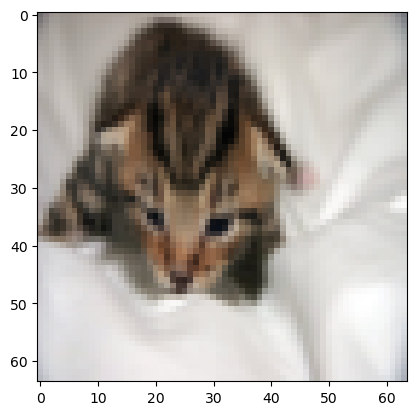

y = 1, you predicted that it is a "cat" picture.


In [22]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_x[:, index].reshape((num_px, num_px, 3)))
plt.show()
print ("y = " + str(test_y_orig[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

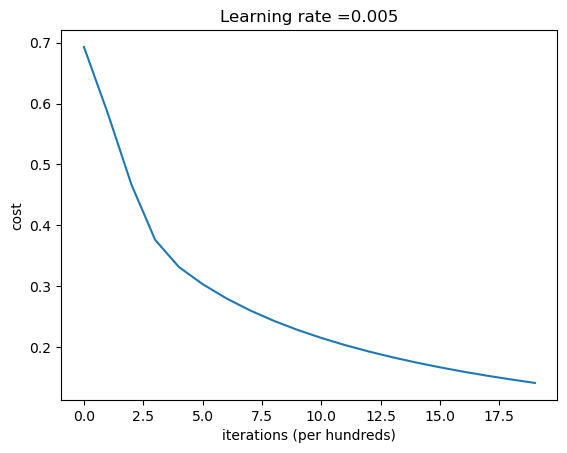

In [23]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

Current Learning Rate: 0.01

-------------------------------------------------------

Current Learning Rate: 0.001

-------------------------------------------------------

Current Learning Rate: 0.0001

-------------------------------------------------------



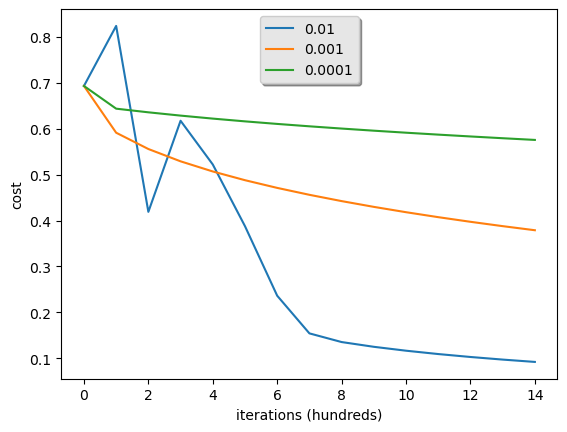

In [24]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print("Current Learning Rate: " + str(lr))
    models[str(lr)] = model(train_x, train_y_orig, test_x, test_y_orig, iters=1500, lr=lr, print_cost=False)

    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

### Try your own Image

In [37]:
# change this to the name of your image file
my_image = "goat-2775034_960_720-3704390797.jpg"   

# We preprocess the image to fit your algorithm.
fname = my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

y = 1.0, your algorithm predicts a "cat" picture.
